In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from ConvNet import ConvNet

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [36]:
def visualize_feature_maps(*feature_maps, channel=0):
    num_maps = len(feature_maps)  # Determine the number of feature maps provided
    fig, axes = plt.subplots(1, num_maps, figsize=(5*num_maps, 5))  # Adjust subplot grid and size dynamically
    
    for i, feature_map in enumerate(feature_maps):
        if feature_map.is_cuda:
            feature_map = feature_map.cpu()
        feature_map_np = feature_map.numpy()
        
        # Select the specified channel and remove the batch dimension
        feature_map_channel = feature_map_np[0, channel, :, :]
        
        # Plot the feature map
        ax = axes[i] if num_maps > 1 else axes  # Handle the case of a single map
        im = ax.imshow(feature_map_channel, cmap='plasma')
        ax.set_title(f"Map {i+1}")
        fig.colorbar(im, ax=ax)  # Show color scale
    
    plt.tight_layout()  # Adjust layouts to fit
    plt.show()


In [5]:
model = ConvNet().to(device=device)
model.load_state_dict(torch.load('model_state_dict.pth'))

<All keys matched successfully>

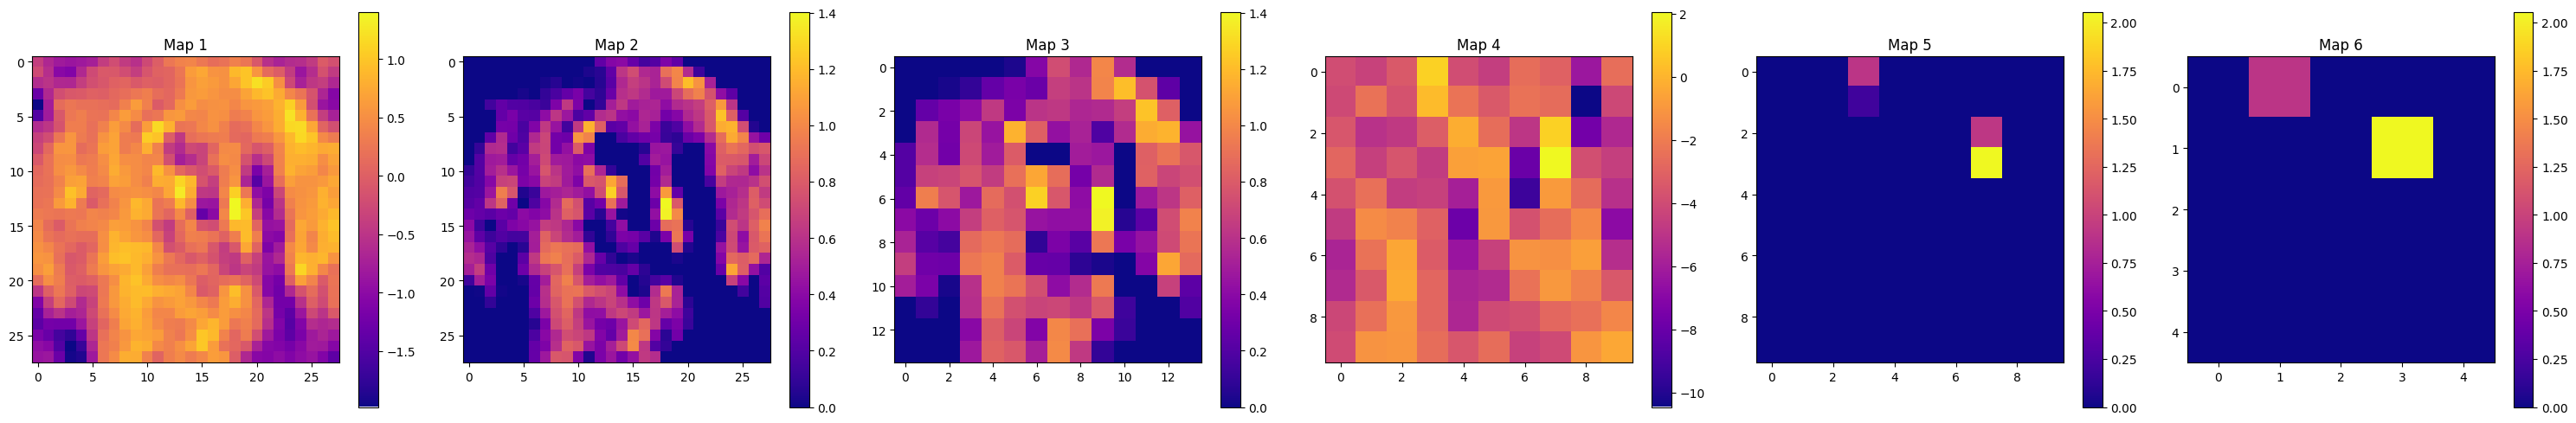

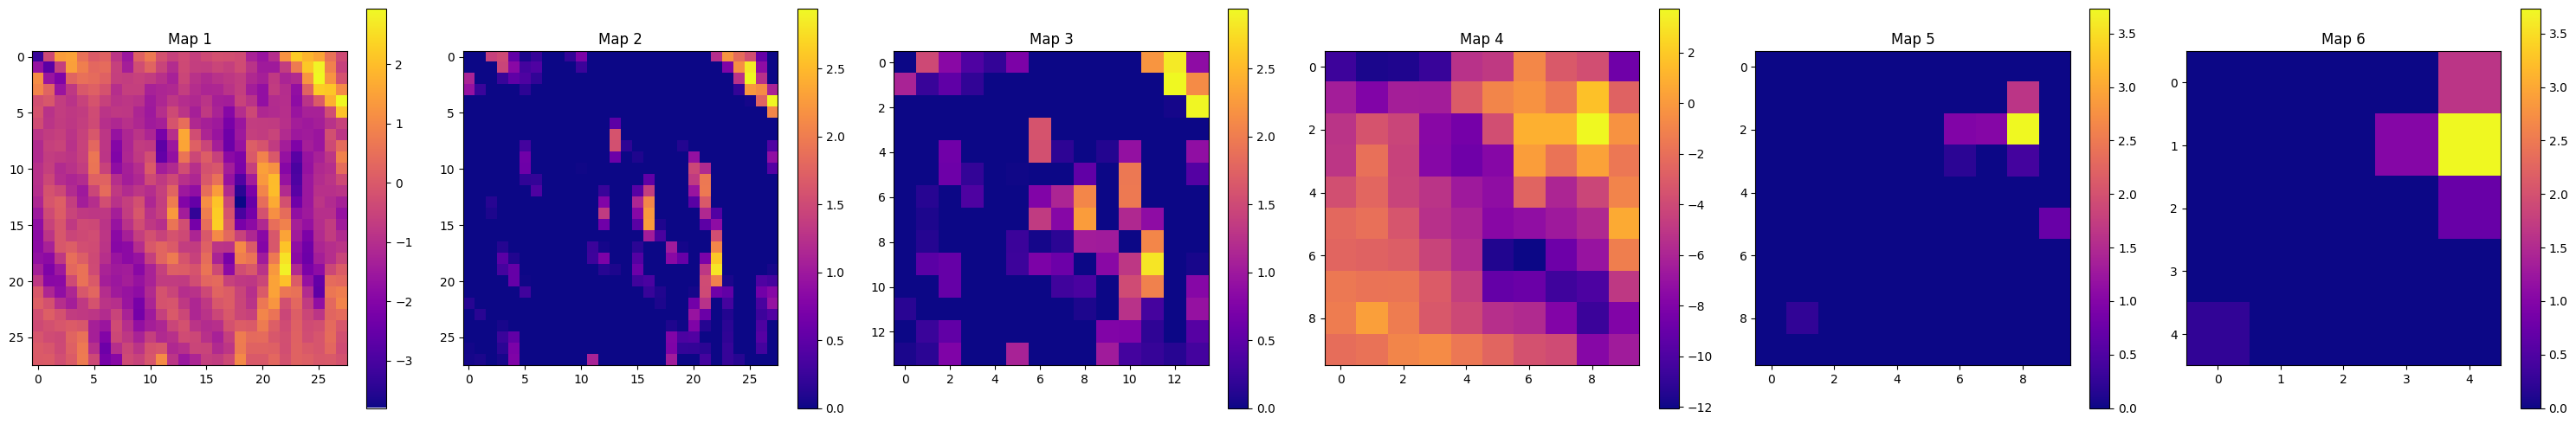

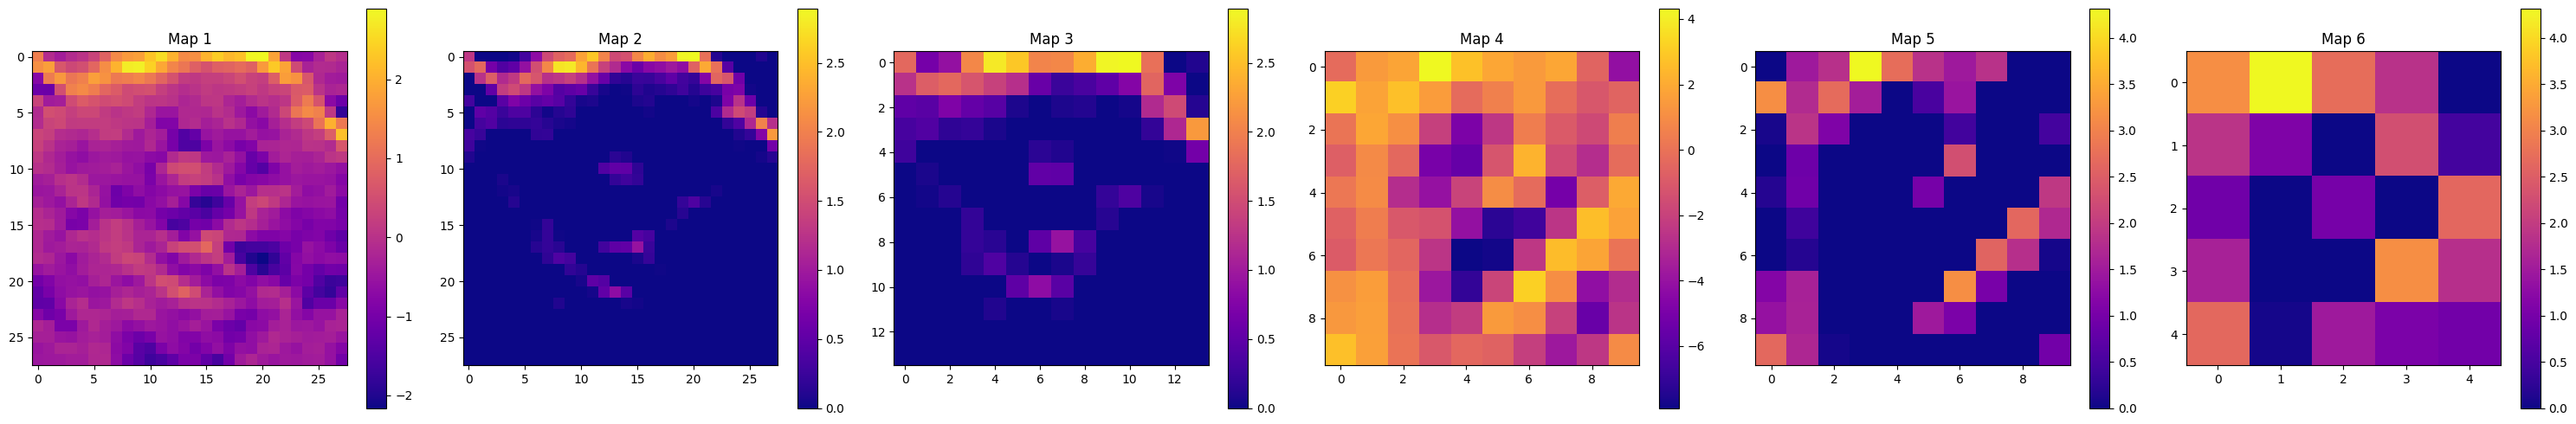

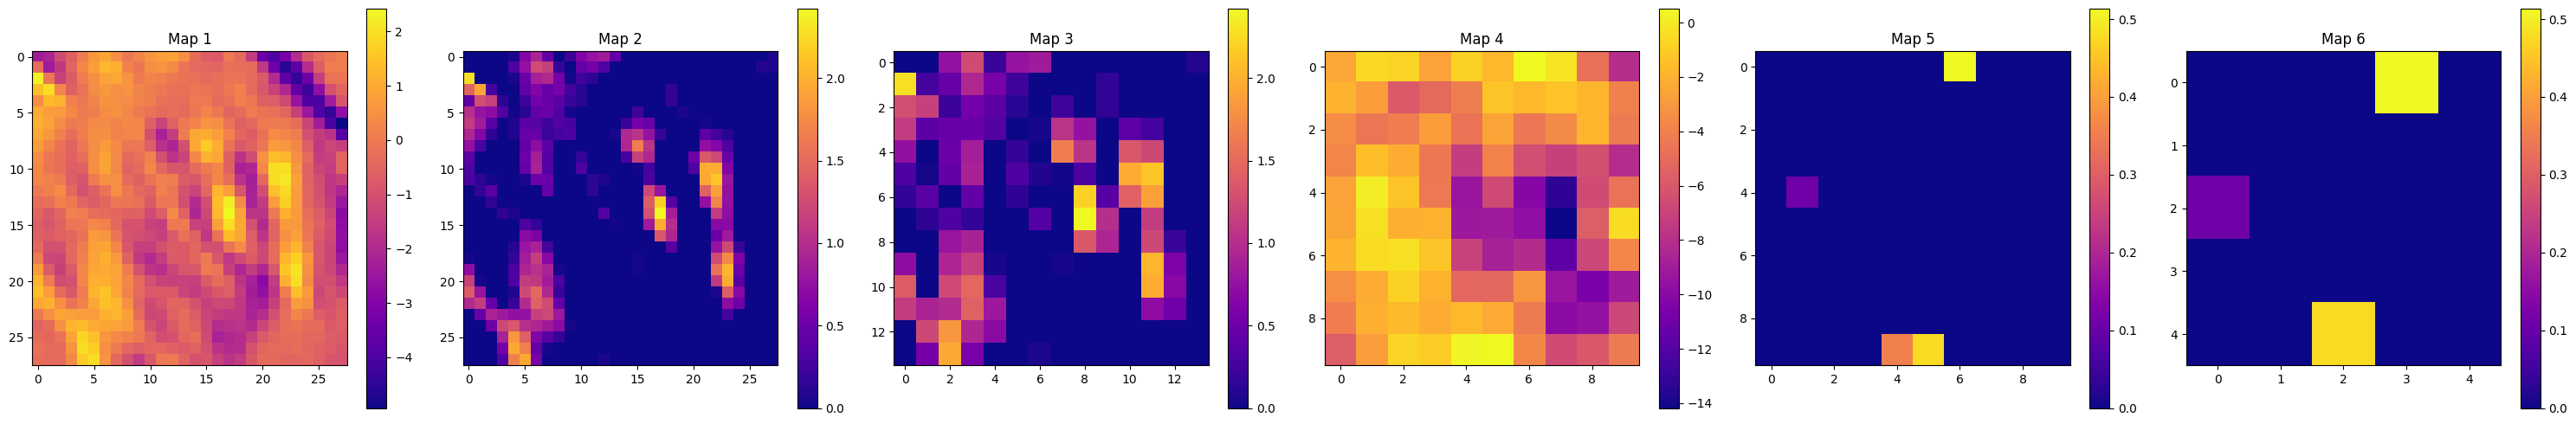

In [52]:
# Get single image and label
image, label = test_dataset[1000]
# Make image batch of single image
image = image.unsqueeze(0)

with torch.no_grad():
    # Move image to vram
    image = image.to(device)

    outputs, pre_activation_maps, post_activation_maps, pool_activation_maps = model(image, True)
    visualize_feature_maps(pre_activation_maps[0], post_activation_maps[0], pool_activation_maps[0], pre_activation_maps[1], post_activation_maps[1], pool_activation_maps[1], channel=0)
    visualize_feature_maps(pre_activation_maps[0], post_activation_maps[0], pool_activation_maps[0], pre_activation_maps[1], post_activation_maps[1], pool_activation_maps[1], channel=1)
    visualize_feature_maps(pre_activation_maps[0], post_activation_maps[0], pool_activation_maps[0], pre_activation_maps[1], post_activation_maps[1], pool_activation_maps[1], channel=2)
    visualize_feature_maps(pre_activation_maps[0], post_activation_maps[0], pool_activation_maps[0], pre_activation_maps[1], post_activation_maps[1], pool_activation_maps[1], channel=3)


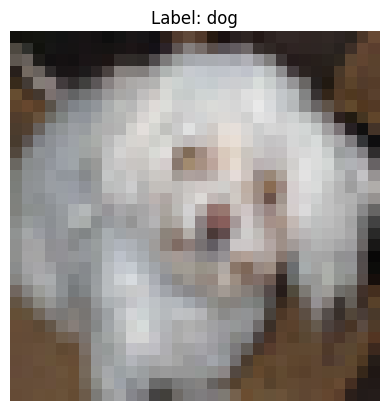

In [51]:
# Assuming 'image' is on the device and has been through the transform
# First, move the tensor back to CPU and remove the batch dimension
image = image.to('cpu').squeeze(0)

# Reverse the normalization
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])
image = image.numpy().transpose((1, 2, 0))  # Rearrange dimensions to height x width x channels
image = image * std + mean  # Reverse normalization
image = np.clip(image, 0, 1)  # Ensure the image's values are within [0, 1]

# Display the image
plt.imshow(image)
plt.title(f'Label: {test_dataset.classes[label]}')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()